In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import pydotplus
from sklearn.metrics import classification_report, confusion_matrix


In [251]:
#read project raw data
hel=pd.read_csv('D:/MITB files/000 ISSS621-Data Science for Business-G2/Project/train_data.csv')
hel.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [252]:
#Read cleaned data
clean_dataset=pd.read_csv('clean_aft_fp.csv')

#here we can choose between clean data set or raw data set
df=clean_dataset
df.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,c,3,Z,3,radiotherapy,R,F,2.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,10,e,1,X,2,anesthesia,S,E,2.0,Trauma,Extreme,2,51-60,4745.0,31-40
2,23,a,6,X,2,anesthesia,S,F,2.0,Trauma,Extreme,2,51-60,4449.0,11-20
3,32,f,9,Y,1,radiotherapy,S,B,3.0,Emergency,Extreme,2,51-60,6167.0,0-10
4,1,d,10,Y,2,gynecology,R,B,4.0,Trauma,Extreme,2,51-60,7223.0,51-60


In [253]:
#check the clean data and data type
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278585 entries, 0 to 278584
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      278585 non-null  int64  
 1   Hospital_type_code                 278585 non-null  object 
 2   City_Code_Hospital                 278585 non-null  int64  
 3   Hospital_region_code               278585 non-null  object 
 4   Available Extra Rooms in Hospital  278585 non-null  int64  
 5   Department                         278585 non-null  object 
 6   Ward_Type                          278585 non-null  object 
 7   Ward_Facility_Code                 278585 non-null  object 
 8   Bed Grade                          278585 non-null  float64
 9   Type of Admission                  278585 non-null  object 
 10  Severity of Illness                278585 non-null  object 
 11  Visitors with Patient              2785

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,Visitors with Patient,Admission_Deposit
count,278585.000000,278585.000000,278585.000000,278585.000000,278585.000000,278585.000000
mean,18.220389,4.791019,3.223242,2.617406,3.052910,4899.553332
std,8.616226,3.098476,1.164887,0.868922,1.319496,1057.912626
min,1.000000,1.000000,0.000000,1.000000,0.000000,1801.000000
25%,11.000000,2.000000,2.000000,2.000000,2.000000,4220.000000
50%,19.000000,5.000000,3.000000,3.000000,3.000000,4759.000000
75%,26.000000,7.000000,4.000000,3.000000,4.000000,5414.000000
max,32.000000,13.000000,24.000000,4.000000,22.000000,11008.000000


In [254]:
test_data = pd.read_csv('D:/MITB files/000 ISSS621-Data Science for Business-G2/Project/test_data.csv')

In [255]:
import pandas as pd
from scipy.stats import chi2_contingency

# # Load the data into a pandas dataframe
# data = pd.read_csv('data.csv')
data = df

# Get a list of all categorical columns
cat_columns = data.select_dtypes(include=['object']).columns

print(cat_columns)

# Create a example contingency table
contingency_table = pd.crosstab(data['Severity of Illness'], data['Stay'])

# Print the contingency table
print(contingency_table)

# Perform the chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)
# Print the p-value
print("P value for Severity of Illness", p)

#The P>|t| column shows the p-value for each variable. 
#Variables with a p-value less than the significance level (usually 0.05) are considered statistically significant and are included in the final model. 
#Variables with a p-value greater than or equal to the significance level are considered not statistically significant and are excluded from the final model.

# Loop over all pairs of categorical variables and perform chi-square test
for i, col1 in enumerate(cat_columns):
        contingency_table = pd.crosstab(data[col1], data['Stay'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f'P-value for {col1} vs "Stay": {p:.4f}')



Index(['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age',
       'Stay'],
      dtype='object')
Stay                  0-10  11-20  21-30  31-40  51-60
Severity of Illness                                   
Extreme               3261  10515  15487  10076   7772
Minor                 7691  27073  21526  14447   7124
Moderate             11921  40532  50441  30614  20105
P value for Severity of Illness 0.0
P-value for Hospital_type_code vs "Stay": 0.0000
P-value for Hospital_region_code vs "Stay": 0.0000
P-value for Department vs "Stay": 0.0000
P-value for Ward_Type vs "Stay": 0.0000
P-value for Ward_Facility_Code vs "Stay": 0.0000
P-value for Type of Admission vs "Stay": 0.0000
P-value for Severity of Illness vs "Stay": 0.0000
P-value for Age vs "Stay": 0.0000
P-value for Stay vs "Stay": 0.0000


In [256]:
# Encode the categorical columns into numeric values using the LabelEncoder from the scikit-learn library.
# apply this to all categorical columns using a loop.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
            'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age','Stay']:
    df[col] = le.fit_transform(df[col])
    mapping = dict(zip(range(len(le.classes_)), le.classes_))
    print(col, mapping) 
 

for col in ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
            'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age']:   
    test_data[col] = le.fit_transform(test_data[col])
    mapping1 = dict(zip(range(len(le.classes_)), le.classes_))
    print(col, mapping1) 
    
    


Hospital_type_code {0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g'}
Hospital_region_code {0: 'X', 1: 'Y', 2: 'Z'}
Department {0: 'TB & Chest disease', 1: 'anesthesia', 2: 'gynecology', 3: 'radiotherapy', 4: 'surgery'}
Ward_Type {0: 'P', 1: 'Q', 2: 'R', 3: 'S', 4: 'T', 5: 'U'}
Ward_Facility_Code {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F'}
Type of Admission {0: 'Emergency', 1: 'Trauma', 2: 'Urgent'}
Severity of Illness {0: 'Extreme', 1: 'Minor', 2: 'Moderate'}
Age {0: '0-10', 1: '11-20', 2: '21-30', 3: '31-40', 4: '41-50', 5: '51-60', 6: '61-70', 7: '71-80', 8: '81-90', 9: '91-100'}
Stay {0: '0-10', 1: '11-20', 2: '21-30', 3: '31-40', 4: '51-60'}
Hospital_type_code {0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g'}
Hospital_region_code {0: 'X', 1: 'Y', 2: 'Z'}
Department {0: 'TB & Chest disease', 1: 'anesthesia', 2: 'gynecology', 3: 'radiotherapy', 4: 'surgery'}
Ward_Type {0: 'P', 1: 'Q', 2: 'R', 3: 'S', 4: 'T', 5: 'U'}
Ward_Facility_Code {0: 'A', 1: 'B', 2: 'C', 3: 'D

In [257]:
#check data type again after encode
df.info()
df.describe()

test_data.info()
test_data.describe()
# all data type are numerical, we are ready to use decision tree/logistics regression

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278585 entries, 0 to 278584
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      278585 non-null  int64  
 1   Hospital_type_code                 278585 non-null  int32  
 2   City_Code_Hospital                 278585 non-null  int64  
 3   Hospital_region_code               278585 non-null  int32  
 4   Available Extra Rooms in Hospital  278585 non-null  int64  
 5   Department                         278585 non-null  int32  
 6   Ward_Type                          278585 non-null  int32  
 7   Ward_Facility_Code                 278585 non-null  int32  
 8   Bed Grade                          278585 non-null  float64
 9   Type of Admission                  278585 non-null  int32  
 10  Severity of Illness                278585 non-null  int32  
 11  Visitors with Patient              2785

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
count,137057.000000,137057.000000,137057.000000,137057.000000,137057.000000,137057.000000,137057.000000,137057.000000,137057.000000,137022.000000,137057.000000,134900.000000,137057.000000,137057.000000,137057.000000,137057.000000,137057.000000
mean,386967.000000,18.343747,1.255711,4.758692,0.779304,3.192686,1.944592,1.886952,3.287056,2.634489,65877.903515,7.243996,0.783098,1.373932,3.284531,4.124386,4869.731097
std,39565.092259,8.634694,1.525928,3.102245,0.754889,1.164250,0.562214,0.804768,1.693618,0.869295,37942.997623,4.790625,0.689712,0.768907,1.777270,1.890007,1080.766723
min,318439.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1800.000000
25%,352703.000000,11.000000,0.000000,2.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,32945.000000,4.000000,0.000000,1.000000,2.000000,3.000000,4178.000000
50%,386967.000000,19.000000,1.000000,5.000000,1.000000,3.000000,2.000000,2.000000,4.000000,3.000000,65786.000000,8.000000,1.000000,2.000000,3.000000,4.000000,4731.000000
75%,421231.000000,26.000000,2.000000,7.000000,1.000000,4.000000,2.000000,2.000000,5.000000,3.000000,98851.000000,8.000000,1.000000,2.000000,4.000000,5.000000,5398.000000
max,455495.000000,32.000000,6.000000,13.000000,2.000000,21.000000,4.000000,5.000000,5.000000,4.000000,131618.000000,38.000000,2.000000,2.000000,32.000000,9.000000,11920.000000


<AxesSubplot:>

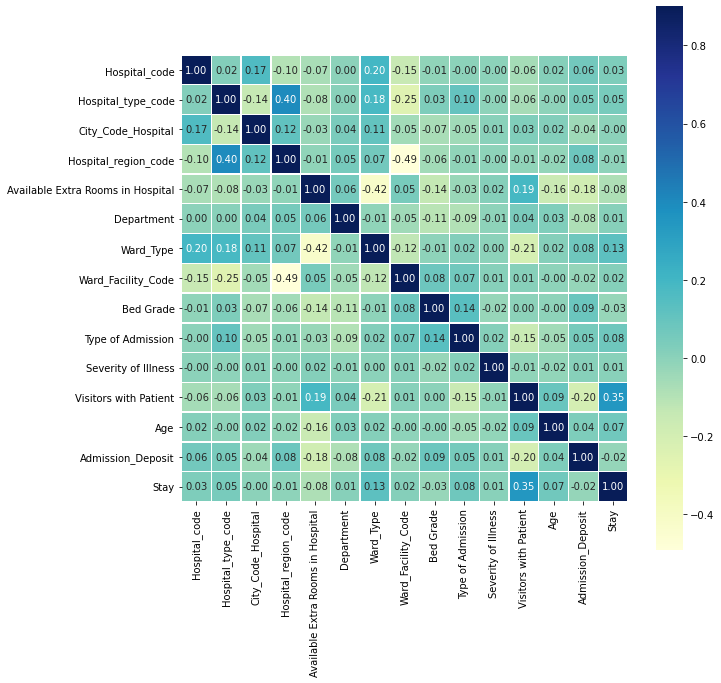

In [156]:
# use the corr() function to compute pairwise correlations for the dataframe
SpearmanCorr = df.corr(method="spearman")
plt.figure(figsize=(10,10))
sns.heatmap(SpearmanCorr, vmax=.9, square=True, annot=True, linewidths=.3, cmap="YlGnBu", fmt='.2f')

<AxesSubplot:>

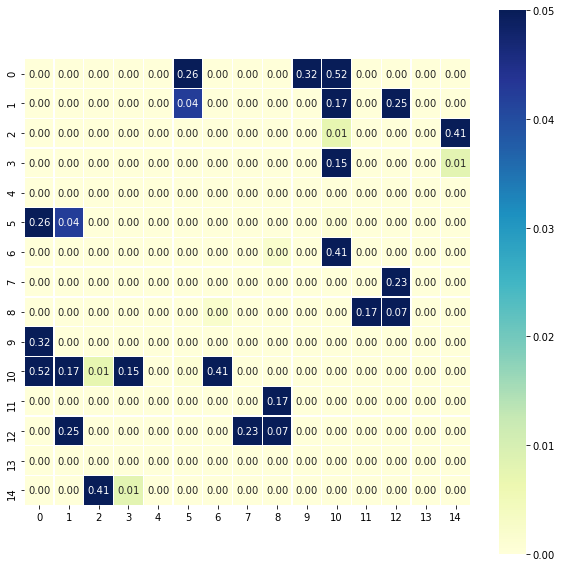

In [157]:
import scipy.stats as stats

# Calculate the p-values
p_values = []
for i in range(len(SpearmanCorr)):
    for j in range(i+1, len(SpearmanCorr)):
        coef, p = stats.spearmanr(df.iloc[:, i], df.iloc[:, j])
        p_values.append(p)

# Create a new dataframe with the p-values
p_values_df = pd.DataFrame(p_values, columns=["p-value"])

# Reshape the p-values into a matrix
p_values_matrix = np.zeros((len(SpearmanCorr), len(SpearmanCorr)))
p_values_matrix[np.triu_indices(len(SpearmanCorr), k=1)] = p_values
p_values_matrix = p_values_matrix + p_values_matrix.T

# heatmap of the p-values
plt.figure(figsize=(10,10))
sns.heatmap(p_values_matrix, vmax=.05, square=True, annot=True, linewidths=.3, cmap="YlGnBu", fmt='.2f')


Observation:
    The correlation coefficient can range from -1 to +1, where -1 indicates a perfect negative correlation, +1 indicates a perfect positive correlation, and 0 indicates no correlation.
    
    Our target variable is "Stay", and other variables are independent variables.
    
    However, in our produced correlation matrix above, most of the value are around 0. This means:
    
    1. there's nearly no strong correlation between all independent variables ==> we can't remove correlated independent variables
    2. there's no strong correlation between any independent variables and our target variable 

### Predictive method 1:
Decision Tree Classifier, try with not removing any of the features 

In [158]:
# Method 1 -- same as lecture note, use all 14 variables here

#split the cleaned data, with 80% - 20% for training and testing
sample_num = df.shape[0]
traning_ratio = 0.8

train_sample_list = df[:int(traning_ratio*sample_num)].values
test_sample_list = df[int(traning_ratio*sample_num):].values

print(sample_num)



278585


In [159]:
#use entropy as criteria for the measure for information impurity, to calculate decision tree clasifier, limit the possible number of leaf nodes

feature_num = df.shape[1]-1
print(feature_num)

clf = tree.DecisionTreeClassifier(criterion="entropy",random_state = 0, max_leaf_nodes=60)
clf = clf.fit(train_sample_list[:, :feature_num], train_sample_list[:, -1])

dot_data = tree.export_graphviz(clf, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("Decision_Tree_Entropy.png")

Dt_Score = clf.score(test_sample_list[:, :feature_num], test_sample_list[:, -1])
print('The decision tree score is {}'.format(round(Dt_Score, 4)))

14
The decision tree score is 0.4182


In [160]:
# Maximum Tree Depth

score_list = []
for max_depth in range(1, 50):
    clf = tree.DecisionTreeClassifier(criterion="entropy", random_state = 0, max_depth=max_depth)
    clf = clf.fit(train_sample_list[:, :feature_num], train_sample_list[:, -1])
    Dt_Score = clf.score(test_sample_list[:, :feature_num], test_sample_list[:, -1])
    print('With Max-Depth {}, the decision tree score : {}'.format(max_depth, round(Dt_Score, 4)))
    score_list.append(Dt_Score)
    
score_list = np.array(score_list)
max_depth = np.argmax(score_list)+1

print('\nThe maximum score {} can first be obtained at tree depth {}'\
      .format(np.max(score_list),max_depth))



With Max-Depth 1, the decision tree score : 0.3027
With Max-Depth 2, the decision tree score : 0.3652
With Max-Depth 3, the decision tree score : 0.3973
With Max-Depth 4, the decision tree score : 0.398
With Max-Depth 5, the decision tree score : 0.4185
With Max-Depth 6, the decision tree score : 0.4123
With Max-Depth 7, the decision tree score : 0.4204
With Max-Depth 8, the decision tree score : 0.4235
With Max-Depth 9, the decision tree score : 0.4235
With Max-Depth 10, the decision tree score : 0.423
With Max-Depth 11, the decision tree score : 0.4212
With Max-Depth 12, the decision tree score : 0.4223
With Max-Depth 13, the decision tree score : 0.4139
With Max-Depth 14, the decision tree score : 0.4088
With Max-Depth 15, the decision tree score : 0.404
With Max-Depth 16, the decision tree score : 0.3971
With Max-Depth 17, the decision tree score : 0.3911
With Max-Depth 18, the decision tree score : 0.3809
With Max-Depth 19, the decision tree score : 0.3736
With Max-Depth 20, the d

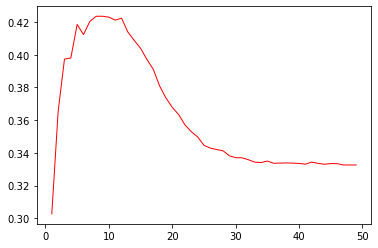

In [161]:
#from the diagram below we see result gets better around 9, 10 and then start to drop and reach plateau around 30

x = np.array(range(1, 50))
y = score_list
plt.plot(x,y,color="red",linewidth=1)
plt.show()

### In this case, the best tree depth is actually 9 give the max score of tree

In [169]:
#Next explore the optimal split ratio for the decision tree model.
max_list = np.where(score_list == np.max(score_list))[0] + 1


score_list = []
for split_num in range(1, 40):
    clf = tree.DecisionTreeClassifier(criterion="entropy", random_state = 0, max_depth = max_depth,
                                        min_samples_leaf=split_num*0.01,
                                        min_samples_split=split_num*0.01)
    clf = clf.fit(train_sample_list[:, :feature_num], train_sample_list[:, -1])
    Dt_Score = clf.score(test_sample_list[:, :feature_num], test_sample_list[:, -1])
    print('Max-Depth {}, Split Ratio {}%, DT Score : {}'.format(max_depth, split_num, round(Dt_Score, 4)))
    score_list.append(Dt_Score)
        

score_list = np.array(score_list)
best_split = np.argmax(score_list[::-1]) + 1
#Manual update of value
best_split = 0.01
print(best_split)

print('\nThe maximum score {} can be obtained at tree depth {} and split ratio {}%.'\
      .format(np.max(score_list),max_depth, best_split ))

Max-Depth 9, Split Ratio 1%, DT Score : 0.4119
Max-Depth 9, Split Ratio 2%, DT Score : 0.409
Max-Depth 9, Split Ratio 3%, DT Score : 0.4032
Max-Depth 9, Split Ratio 4%, DT Score : 0.3931
Max-Depth 9, Split Ratio 5%, DT Score : 0.3899
Max-Depth 9, Split Ratio 6%, DT Score : 0.3897
Max-Depth 9, Split Ratio 7%, DT Score : 0.3935
Max-Depth 9, Split Ratio 8%, DT Score : 0.3831
Max-Depth 9, Split Ratio 9%, DT Score : 0.3788
Max-Depth 9, Split Ratio 10%, DT Score : 0.38
Max-Depth 9, Split Ratio 11%, DT Score : 0.3807
Max-Depth 9, Split Ratio 12%, DT Score : 0.3871
Max-Depth 9, Split Ratio 13%, DT Score : 0.3871
Max-Depth 9, Split Ratio 14%, DT Score : 0.3871
Max-Depth 9, Split Ratio 15%, DT Score : 0.3871
Max-Depth 9, Split Ratio 16%, DT Score : 0.3871
Max-Depth 9, Split Ratio 17%, DT Score : 0.343
Max-Depth 9, Split Ratio 18%, DT Score : 0.343
Max-Depth 9, Split Ratio 19%, DT Score : 0.343
Max-Depth 9, Split Ratio 20%, DT Score : 0.343
Max-Depth 9, Split Ratio 21%, DT Score : 0.3211
Max-Dept

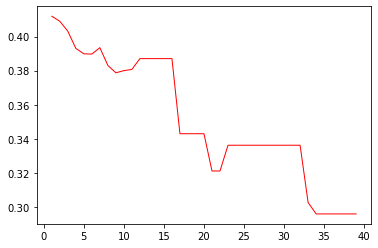

In [170]:
x = np.array(range(1, 40))
y = np.array(score_list)
plt.plot(x,y,color="red",linewidth=1)
plt.show()

Since this model is using all 14 features and it's quite heavy for the training, we explore other preditive analysis methods

We will explore the Max Feature Number --- how to select the maximum feature number for the decision tree model.

In [171]:

score_list = []
for max_features in range(2, feature_num):
    clf = tree.DecisionTreeClassifier(criterion="entropy", random_state = 0, max_depth=max_depth,
                                        min_samples_leaf=best_split*0.01,
                                        min_samples_split=best_split*0.01,
                                        max_features=max_features)
    clf = clf.fit(train_sample_list[:, :feature_num], train_sample_list[:, -1])
    Dt_Score = clf.score(test_sample_list[:, :feature_num], test_sample_list[:, -1])
    Dt_error = 1-Dt_Score
    print('Max-Depth {}, Split Ratio {}%, Feature Number {}, DT Score/Error : {}, {}'.format(max_depth,
                                                                                                 best_split, 
                                                                                                max_features, 
                                                                                                round(Dt_Score, 4),
                                                                                                round(Dt_error, 4)))
    score_list.append(Dt_Score)
    best_fnumber = np.argmax(score_list) + 2

print('\nThe maximum score {} can be first obtained at tree depth {}, split ratio {}% and feature number {}.'\
      .format(np.max(score_list),max_depth, best_split,best_fnumber))

Max-Depth 9, Split Ratio 0.01%, Feature Number 2, DT Score/Error : 0.3923, 0.6077
Max-Depth 9, Split Ratio 0.01%, Feature Number 3, DT Score/Error : 0.415, 0.585
Max-Depth 9, Split Ratio 0.01%, Feature Number 4, DT Score/Error : 0.4119, 0.5881
Max-Depth 9, Split Ratio 0.01%, Feature Number 5, DT Score/Error : 0.421, 0.579
Max-Depth 9, Split Ratio 0.01%, Feature Number 6, DT Score/Error : 0.4162, 0.5838
Max-Depth 9, Split Ratio 0.01%, Feature Number 7, DT Score/Error : 0.4217, 0.5783
Max-Depth 9, Split Ratio 0.01%, Feature Number 8, DT Score/Error : 0.4209, 0.5791
Max-Depth 9, Split Ratio 0.01%, Feature Number 9, DT Score/Error : 0.4226, 0.5774
Max-Depth 9, Split Ratio 0.01%, Feature Number 10, DT Score/Error : 0.4223, 0.5777
Max-Depth 9, Split Ratio 0.01%, Feature Number 11, DT Score/Error : 0.424, 0.576
Max-Depth 9, Split Ratio 0.01%, Feature Number 12, DT Score/Error : 0.4237, 0.5763
Max-Depth 9, Split Ratio 0.01%, Feature Number 13, DT Score/Error : 0.4228, 0.5772

The maximum score

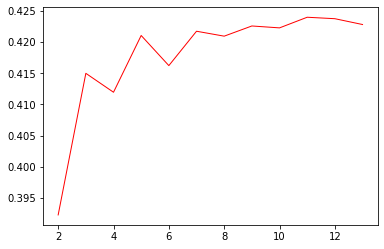

In [172]:
x = np.array(range(2, feature_num ))
y = np.array(score_list)
plt.plot(x,y,color="red",linewidth=1)
plt.show()

In [112]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state = 0, max_depth=max_depth,
                                  min_samples_leaf=best_split*0.01,
                                  min_samples_split=best_split*0.01,
                                  max_features=best_fnumber)
clf = clf.fit(train_sample_list[:, :feature_num], train_sample_list[:, -1])
Dt_Score = clf.score(test_sample_list[:, :feature_num], test_sample_list[:, -1])
Dt_error = 1-Dt_Score
print('The best decision tree model we have obtained is the following:')
print('Max-Depth {}, Split Ratio {}%, Feature Number {}, DT Score/Error : {}, {}'.
      format(max_depth,best_split,best_fnumber,round(Dt_Score, 4),round(Dt_error, 4)))

feat_importance = clf.tree_.compute_feature_importances(normalize=False)
print("Feature importance = " + str([round(i, 4) for i in feat_importance]))
print(df.columns.values[:-1])

The best decision tree model we have obtained is the following:
Max-Depth 9, Split Ratio 0.01%, Feature Number 11, DT Score/Error : 0.424, 0.576
Feature importance = [0.0053, 0.0042, 0.0055, 0.0022, 0.005, 0.0019, 0.1131, 0.0034, 0.0277, 0.0318, 0.0038, 0.1833, 0.0015, 0.0226]
['Hospital_code' 'Hospital_type_code' 'City_Code_Hospital'
 'Hospital_region_code' 'Available Extra Rooms in Hospital' 'Department'
 'Ward_Type' 'Ward_Facility_Code' 'Bed Grade' 'Type of Admission'
 'Severity of Illness' 'Visitors with Patient' 'Age' 'Admission_Deposit']


In [179]:
#Here we try an alternative feature number and depth, it appeared to have lower mark than the ooptimum we found.

alternative_fnumber = 8
alternative_depth = 20 #We need a larger maximum tree depth to admit more features

clf = tree.DecisionTreeClassifier(criterion="entropy", random_state = 0, max_depth=alternative_depth,
                                  min_samples_leaf=best_split*0.01,
                                  min_samples_split=best_split*0.01,
                                  max_features=alternative_fnumber)
clf = clf.fit(train_sample_list[:, :feature_num], train_sample_list[:, -1])
Dt_Score = clf.score(test_sample_list[:, :feature_num], test_sample_list[:, -1])
Dt_error = 1 - Dt_Score
print('An alternative decision tree model is the following:')
print('Max-Depth {}, Split Ratio {}%, Feature Number {}, DT Score/Error : {}, {}'.
      format(alternative_depth,best_split,alternative_fnumber,round(Dt_Score, 4),round(Dt_error, 4)))

feat_importance = clf.tree_.compute_feature_importances(normalize=False)
print("Feature importance = " + str([round(i, 4) for i in feat_importance]))
print(df.columns.values[:-1])

dot_data = tree.export_graphviz(clf, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("Decision_Tree_feature_compare.png")

An alternative decision tree model is the following:
Max-Depth 20, Split Ratio 0.01%, Feature Number 8, DT Score/Error : 0.4092, 0.5908
Feature importance = [0.0218, 0.0112, 0.0149, 0.004, 0.0208, 0.007, 0.1261, 0.0088, 0.0364, 0.0316, 0.0153, 0.1718, 0.0238, 0.0843]
['Hospital_code' 'Hospital_type_code' 'City_Code_Hospital'
 'Hospital_region_code' 'Available Extra Rooms in Hospital' 'Department'
 'Ward_Type' 'Ward_Facility_Code' 'Bed Grade' 'Type of Admission'
 'Severity of Illness' 'Visitors with Patient' 'Age' 'Admission_Deposit']
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0643926 to fit



True

In [248]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


# Stay {0: '0-10', 1: '11-20', 2: '21-30', 3: '31-40', 4: '51-60'}
# with this result, the mis-classification rate is quite high, only type 2: 21-30 days has more than 50% accuracy.

[[  800  2852  2666   470    89]
 [ 1326  9097  9726  2308  1016]
 [ 1215  8058 14093  2334   740]
 [  429  3149  5571  4037  3171]
 [  134  1034  1339  2877  5045]]
              precision    recall  f1-score   support

           0       0.20      0.12      0.15      6877
           1       0.38      0.39      0.38     23473
           2       0.42      0.53      0.47     26440
           3       0.34      0.25      0.28     16357
           4       0.50      0.48      0.49     10429

    accuracy                           0.40     83576
   macro avg       0.37      0.35      0.36     83576
weighted avg       0.38      0.40      0.39     83576



### Predictive Analysis method 2: (Stepwise regression)

Since we have many independent variables, we think alone the line of MULTIPLE REGRESSION

We tried to use the stepwise regression (or stepwise selection), which  consists of iteratively adding and removing
independent variables, in the predictive model, in order to find the subset of variables in the data
set resulting in the best performing model that is a model that lowers prediction error.

There are 3 strategies for stepwise regression, we use forward selection:

1. Forward selection, which starts with no predictors in the model, iteratively adds the most
contributive predictors, and stops when the improvement is no longer statistically
significant.
2. Backward selection (or backward elimination), which starts with all predictors in the
model (full model), iteratively removes the least contributive predictors, and stops when
you have a model where all predictors are statistically significant.
3. Stepwise selection (or sequential replacement), which is a combination of forward and
backward selections. We start with no predictors, then sequentially add the most
contributive predictors (like forward selection). After adding each new variable, remove
any variables that no longer provide an improvement in the model fit (like backward
selection).


In [208]:
import pandas as pd
import statsmodels.api as sm


# Split the dataset into predictor and target variables
X = df.drop('Stay', axis=1)
y = df['Stay']

# from sklearn.model_selection import train_test_split
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Add a constant term to the predictor variables for both train and test sets
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Create an empty list to store the selected features
selected_features = []

# Fit the initial model using the train set, look at the raw result
model = sm.OLS(y_train, X_train).fit()

print(model.summary(), "\n")
y_predict = model.predict(X_test)
mse = np.mean((y_predict - y_test) ** 2)
print("Original Mean Squared Error: ", mse)


# Perform forward stepwise regression
while True:
    pvals = model.pvalues[1:]
    max_pval = pvals.max()
    if max_pval > 0.05:
        max_feature = pvals.idxmax()
        print("feature dropped:",max_feature )
        X_train.drop(max_feature, axis=1, inplace=True)
        model = sm.OLS(y_train, X_train).fit()
    else:
        break

#after step wise, use the selected features to train the final model using the train set
selected_features = X_train.columns[1:].tolist()
print("selected features are:",selected_features)
X_train_final = X_train[selected_features]
X_test_final = X_test[selected_features]
model_final = sm.OLS(y_train, X_train_final).fit()

# Evaluate the final model using the test set
y_pred = model_final.predict(X_test_final)
mse = np.mean((y_pred - y_test) ** 2)

print(model_final.summary())
print("By using stepwise, the Mean Squared Error: ", mse)



                            OLS Regression Results                            
Dep. Variable:                   Stay   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     4639.
Date:                Thu, 23 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:52:18   Log-Likelihood:            -3.1786e+05
No. Observations:              222868   AIC:                         6.358e+05
Df Residuals:                  222853   BIC:                         6.359e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

### In the linear regression result above:

R-squared: This is a measure of how well the model fits the data, with values ranging from 0 to 1. The higher the R-squared, the better the model is at explaining the variability of the dependent variable.
In this case, the uncentered R-squared is 0.809, which means that the independent variables in the model explain 80.9% of the variability in the dependent variable.

Coefficients: These represent the estimated effect of each independent variable on the dependent variable.
These features has the highest co-efficients:
Visitors with Patient                 0.4049      
Ward_Type                             0.2675
Type of Admission                     0.2079 

The P>|t| column shows the p-value for each variable. 
Variables with a p-value less than the significance level (usually 0.05) are considered statistically significant and are included in the final model. 
Variables with a p-value greater than or equal to the significance level are considered not statistically significant and are excluded from the final model.

 A p-value below 0.05 (or whatever significance level is chosen) indicates that the variable is statistically significant and should be included in the model.
 we would generally want to drop variables with a p-value greater than 0.05. 
 However,most of the values have P value < 0.05, most of the features are used. Stepwise didn't reduce number of variables used other than Severity of Illness


### Predictive method 3: Decision Tree Classifier, manually removed some of the "generic" features 

#### Manual data column selection
in earlier analysis, we have "working with useless variables" part, and we removed case_id and patientid. And in stepwise there's 1 feature we could drop with P value >0.05.

We would like to explore how useful are the high level data such as hospital level, city level, region level etc. Hence we introduce experiment to manual remove some "generic" features to see the outcome.


We take a further analysis into each individual column, based on our observation, we decide to remove/keep the below variables:

1. Hospital_code	Unique code for the Hospital
**REMOVE**:  it's most likely not affect the individual length of stay as it's replacing hospital name, similar to other id field
   




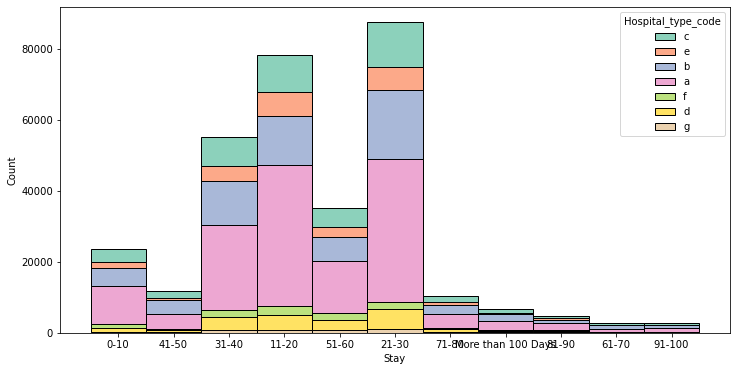

In [258]:
fig, ax = plt.subplots(figsize = (12,6))    
sns.histplot(x = 'Stay', data = hel, hue = "Hospital_type_code",palette = 'Set2', multiple = "stack")
plt.show()

2. Hospital_type_code	Unique code for the type of Hospital, {0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g'}
   
**KEEP**: this may affect the type of disease hospital deal with

3. City_Code_Hospital	City Code of the Hospital
   
**REMOVE**: it's information at city level, it's most likely not affect the individual length of stay 

4. Hospital_region_code	Region Code of the Hospital
   
**REMOVE**: it's information at hospital level, it's most likely not affect the individual length of stay 



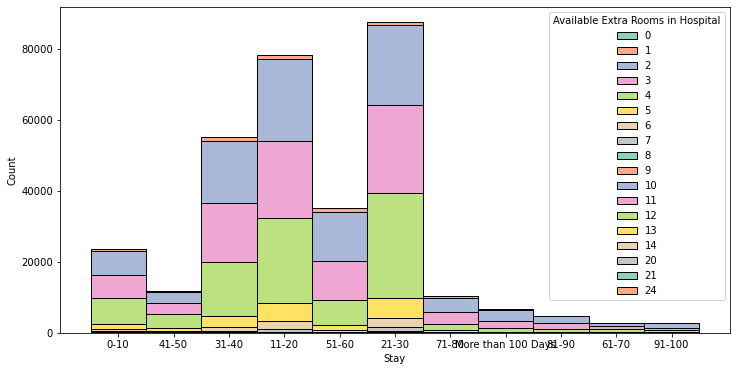

In [259]:
fig, ax = plt.subplots(figsize = (12,6))    
sns.histplot(x = 'Stay', data = hel, hue = "Available Extra Rooms in Hospital",palette = 'Set2', multiple = "stack")
plt.show()

5. Available Extra Rooms in Hospital	Number of Extra rooms available in the Hospital
   
**KEEP**: this is number of bed available in hospital upon patient admission

6. Department	Department overlooking the case  {0: 'TB & Chest disease', 1: 'anesthesia', 2: 'gynecology', 3: 'radiotherapy', 4: 'surgery'}

**KEEP**: this give us information for patient admission department



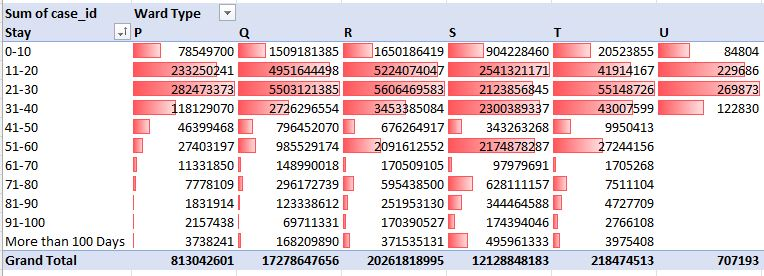

7. Ward_Type	Code for the Ward type
   
**KEEP**: some ward type has relatively short stay while some ward type has more cases or long stay

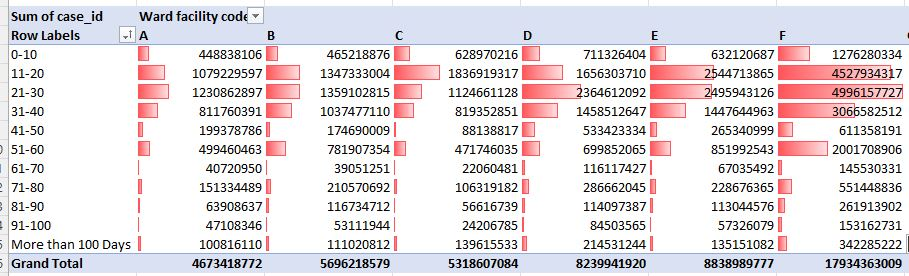

8. Ward_Facility_Code	Code for the Ward Facility
   
**KEEP**: with different ward facility code we see different length of stay pattern
    



9. Bed Grade	Condition of Bed in the Ward

**REMOVE**: it's about ward condition not patient condition

10. City_Code_Patient	City Code for the patient
**REMOVE**: it's location of patient

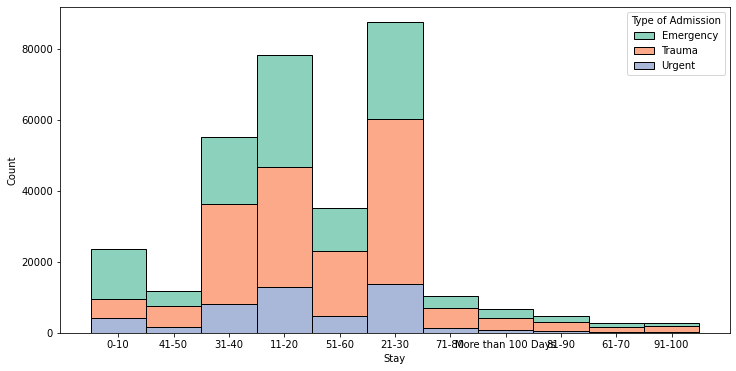

In [260]:
fig, ax = plt.subplots(figsize = (12,6))    
sns.histplot(x = 'Stay', data = hel, hue = "Type of Admission",palette = 'Set2', multiple = "stack")
plt.show()

11. Type of Admission	Admission Type registered by the Hospital {0: 'Emergency', 1: 'Trauma', 2: 'Urgent'}
**KEEP**: it's specific to individual patients' type of admission

12. Severity of Illness	Severity of the illness recorded at the time of admission  {0: 'Extreme', 1: 'Minor', 2: 'Moderate'}
**KEEP**: it's specific to individual patients' type of admission

13. Visitors with Patient	Number of Visitors with the patient
**KEEP**: there's some correlation with length of stay

14. Age	Age of the patient
**KEEP**: : individual attribute about patient

15. Admission_Deposit	Deposit at the Admission Time
**REMOVE**

In [261]:
df1 = df.drop(['Hospital_code', 'City_Code_Hospital','Hospital_region_code', 'Bed Grade', 'Admission_Deposit'], axis = 1)
X1 = df1.drop(['Stay'], axis=1)
y1 = df1['Stay']

# count how many features are there
feature_num = df1.shape[1]-1
print(feature_num)

#split the cleaned data, with 80% - 20% for training and testing
sample_num = df1.shape[0]
traning_ratio = 0.8

train_sample_list = df1[:int(traning_ratio*sample_num)].values
test_sample_list = df1[int(traning_ratio*sample_num):].values

print(sample_num)

9
278585


In [262]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278585 entries, 0 to 278584
Data columns (total 10 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   Hospital_type_code                 278585 non-null  int32
 1   Available Extra Rooms in Hospital  278585 non-null  int64
 2   Department                         278585 non-null  int32
 3   Ward_Type                          278585 non-null  int32
 4   Ward_Facility_Code                 278585 non-null  int32
 5   Type of Admission                  278585 non-null  int32
 6   Severity of Illness                278585 non-null  int32
 7   Visitors with Patient              278585 non-null  int64
 8   Age                                278585 non-null  int32
 9   Stay                               278585 non-null  int32
dtypes: int32(8), int64(2)
memory usage: 12.8 MB


In [263]:
clf1 = tree.DecisionTreeClassifier(criterion='gini', splitter='best', 
                                  max_depth=None, min_samples_split=2, min_samples_leaf=1,
                                  min_weight_fraction_leaf=0.0, max_features='auto', random_state=None, 
                                  max_leaf_nodes=60, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
clf1.fit(X1, y1)

DecisionTreeClassifier(max_features='auto', max_leaf_nodes=60)

In [264]:
Dt_Score = clf.score(test_sample_list[:, :feature_num], test_sample_list[:, -1])
print('The decision tree score is {}'.format(round(Dt_Score, 4)))

The decision tree score is 0.3311


In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,
                           feature_names=['Available Extra Rooms in Hospital','Department','Ward_Type','Ward_Facility_Code',
                                         'Type of Admission','Severity of Illness','Visitors with Patient','Age','Stay'],
                           #class_names= ['0-10' '11-20' '21-30' '31-40' '51-60']
                           filled=True, rounded=True,
                           special_characters=True)


#print(dot_data)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("Decision_Tree_LessVariableGini.png")


In [234]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_7 <= 3.50
|   |--- feature_5 <= 0.50
|   |   |--- feature_3 <= 2.50
|   |   |   |--- feature_0 <= 24.50
|   |   |   |   |--- feature_0 <= 16.50
|   |   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |   |--- feature_8 <= 2.50
|   |   |   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 3.50
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |--- feature_1 >  3.50
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 11.50
|   |   |   |   |   |   |   |   |   |   |--- feature_4 <= 4.50
|   |   |   |  

### However, this method is not ideal as most of the gini is between 0.4 to 0.6, and the decision tree score is around 0.35, it's lower than the value of using full feature list/stepwise

### Method 4 - RandomForestClassifier 


Next we tried with RandomForestClassifier, our reason to try RandomForestClassifier is as below:


Given Length of stay prediction seems a complex problem to solve, random forest classifier is like gather a group of experts from different fields to provide their input. Each expert provides their opinion based on their expertise and experience. Then, the experts would vote to arrive at a final decision.

In a random forest classification, multiple decision trees are created using different random subsets of the data and features. Each decision tree is like an expert, providing its opinion on how to classify the data. Predictions are made by calculating the prediction for each decision tree, then taking the most popular result. (For regression, predictions use an averaging technique instead.)

Random Forest is an ensemble learning method for classification, regression and other tasks, which can be used in scenarios where we have a large number of features (we have 14 in original list), some of which might be irrelevant(the correlation between features are very low), and we need to predict a binary or multi-class outcome (we need multi-class outcome as length of stay class).

Benefit of using Random Forest classifier are:

High-dimensional datasets: Random Forest is able to handle a large number of input features with low risk of overfitting.

Missing values: Random Forest is able to handle missing data, which can be a problem for other classification methods.

Noisy data: Random Forest is able to handle noisy data without overfitting.

Non-linear decision boundaries: Random Forest is able to model non-linear decision boundaries effectively.


In [242]:
# method 4 

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) # 70% training and 30% test

In [244]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the performance of the classifier
print(classification_report(y_test, y_pred))


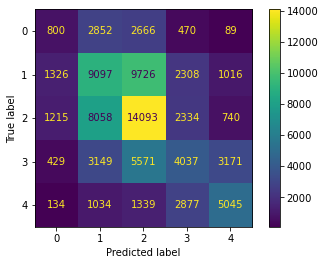

In [246]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [121]:
from scipy.stats import chisquare
df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
Hospital_code,1.000000,-0.120348,0.188186,-0.117262,0.002342,0.020718,0.019022,0.157339,0.012459,-0.034909,0.011297,0.002345,-0.003781,-0.006672,-0.023987
Hospital_type_code,-0.120348,1.000000,0.421212,0.568354,0.004495,-0.007341,-0.006440,0.038665,-0.012177,0.044113,-0.006549,0.013330,0.000904,0.017235,0.010228
City_Code_Hospital,0.188186,0.421212,1.000000,0.413336,-0.019102,0.014319,-0.017165,0.259416,-0.010803,-0.110144,-0.050864,0.018699,-0.013209,0.004260,-0.044650
Hospital_region_code,-0.117262,0.568354,0.413336,1.000000,-0.002323,-0.009287,0.116755,0.454699,-0.009512,-0.097221,-0.037746,-0.004908,-0.006392,-0.001853,-0.022801
Available Extra Rooms in Hospital,0.002342,0.004495,-0.019102,-0.002323,1.000000,0.049098,0.275771,0.008851,-0.024114,-0.023186,-0.012950,0.053822,-0.000267,0.018722,0.024607
Department,0.020718,-0.007341,0.014319,-0.009287,0.049098,1.000000,0.013429,-0.001316,-0.018979,-0.019274,0.016870,0.034408,0.001110,-0.020710,-0.005109
Ward_Type,0.019022,-0.006440,-0.017165,0.116755,0.275771,0.013429,1.000000,0.126663,0.018607,-0.059622,-0.029247,0.025861,-0.006328,0.000704,0.010916
Ward_Facility_Code,0.157339,0.038665,0.259416,0.454699,0.008851,-0.001316,0.126663,1.000000,-0.005836,-0.146801,-0.055030,-0.026293,-0.001736,-0.013903,-0.053333
Bed Grade,0.012459,-0.012177,-0.010803,-0.009512,-0.024114,-0.018979,0.018607,-0.005836,1.000000,-0.001794,-0.020723,0.048650,0.016703,0.016261,-0.060006
Type of Admission,-0.034909,0.044113,-0.110144,-0.097221,-0.023186,-0.019274,-0.059622,-0.146801,-0.001794,1.000000,-0.022362,-0.098756,0.038775,0.005277,0.082572


## Method 5 Naive Bayes

Lastly we decide to try Naive Bayes:
We want to try it because it's well-suited for multi-class classification problems, where there are more than two classes. (which is our case)


Three types of Naive Bayes Classfiers are widely used (Gaussian-NB，Multinomial-NB, Bernoulli-NB)

1) if most variables are continuous variables from normal distributions, we use Gaussian-NB

2) if most variables describe discrete frequency counts, we use Multinomial-NB ==> in this case we will use this method

3) if we have binary variables or variables with very sparse values, we use Bernoulli-NB.

In [122]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

train_sample_list = clean_dataset[:int(0.8*sample_num)].values 
test_sample_list = clean_dataset[int(0.8*sample_num):].values


G_clf = GaussianNB()
M_clf = MultinomialNB()
B_clf = BernoulliNB(binarize=np.mean(train_sample_list[:, :9], axis=0))

G_clf.fit(train_sample_list[:, :9], train_sample_list[:, -1])
M_clf.fit(train_sample_list[:, :9], train_sample_list[:, -1])
B_clf.fit(train_sample_list[:, :9], train_sample_list[:, -1])

input_f = test_sample_list[:, :9]
G_loss = np.mean(np.abs(G_clf.predict(input_f) -test_sample_list[:, -1]))
M_loss = np.mean(np.abs(M_clf.predict(input_f) -test_sample_list[:, -1]))
B_loss = np.mean(np.abs(B_clf.predict(input_f) -test_sample_list[:, -1]))
print('\nGaussian Error : {}\nMultiNomial Error : {}\nBernoulli Error : {}'.format(round(G_loss, 4), round(M_loss, 4), round(B_loss, 4)))




Gaussian Error : 1.0547
MultiNomial Error : 0.9789
Bernoulli Error : 0.9753


In [123]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(clean_dataset.drop('Stay', axis=1), clean_dataset['Stay'], test_size=0.2, random_state=42)

# Create a Naive Bayes classifier
nb = GaussianNB()

# Train the classifier
nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb.predict(X_test)

# Evaluate the performance of the classifier
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.30      0.05      0.08      4497
           1       0.37      0.38      0.37     15642
           2       0.42      0.67      0.52     17572
           3       0.40      0.17      0.23     11048
           4       0.46      0.41      0.43      6958

    accuracy                           0.41     55717
   macro avg       0.39      0.33      0.33     55717
weighted avg       0.40      0.41      0.37     55717



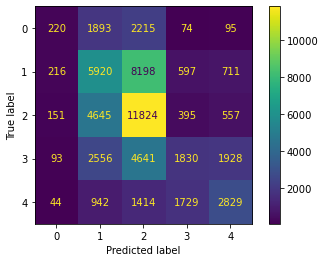

In [124]:
labels = [0,1,2,3,4]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

### To interpret above confusion matrix, the definition of 0-4 is: Stay {0: '0-10', 1: '11-20', 2: '21-30', 3: '31-40', 4: '51-60'}
The model will be able to predict 11-20 and 21-30 well.